In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [3]:
df = pd.read_csv('..\\data\\preprocessig_data.csv')
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33.0,196.0
1,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33.0,196.0
2,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29.0,221.0
3,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,48.0,136.0
4,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25.0,255.0
5,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.6,27.0,244.0
6,ACURA,RLX,MID-SIZE,3.5,6.0,AS6,Z,11.9,7.7,10.0,28.0,230.0
7,ACURA,TL,MID-SIZE,3.5,6.0,AS6,Z,11.8,8.1,10.1,28.0,232.0
8,ACURA,TL AWD,MID-SIZE,3.7,6.0,AS6,Z,12.8,9.0,11.1,25.0,255.0
9,ACURA,TL AWD,MID-SIZE,3.7,6.0,M6,Z,13.4,9.5,11.6,24.0,267.0


In [ ]:
# # Create an instance of the MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 70))
# # Assuming 'data' is your dataset and 'column' is the column you want to scale
# # You need to reshape the column to a 2D array before scaling
# column_to_scale = df['CO2 Emissions(g/km)'].values.reshape(-1, 1)
# # Fit and transform the column using the scaler
# scaled_column = scaler.fit_transform(column_to_scale)
# # Replace the original column in the dataset with the scaled values
# df['CO2 Emissions(g/km)'] = scaled_column
# df['CO2 Emissions(g/km)'] 

0       16.532663
1       16.532663
2       20.929648
3        5.979899
4       26.909548
          ...    
6300    20.577889
6301    22.864322
6302    24.271357
6303    22.864322
6304    25.678392
Name: CO2 Emissions(g/km), Length: 6305, dtype: float64

In [ ]:
x = df.drop(['CO2 Emissions(g/km)','Model','Vehicle Class'], axis=1)
y = df['CO2 Emissions(g/km)']


In [ ]:
x.head(5)

,Make,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,ACURA,2.0,4.0,AS5,Z,9.9,6.7,8.5,33.0
1,ACURA,2.0,4.0,AS5,Z,9.9,6.7,8.5,33.0
2,ACURA,2.4,4.0,M6,Z,11.2,7.7,9.6,29.0
3,ACURA,1.5,4.0,AV7,Z,6.0,5.8,5.9,48.0
4,ACURA,3.5,6.0,AS6,Z,12.7,9.1,11.1,25.0


In [ ]:
# Convert categorical features to one-hot encoding
categorical_cols = ['Make', 'Transmission', 'Fuel Type']
x = pd.get_dummies(x, columns=categorical_cols)

x


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_X,Fuel Type_Z
0,2.0,4.0,9.9,6.7,8.5,33.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2.0,4.0,9.9,6.7,8.5,33.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2.4,4.0,11.2,7.7,9.6,29.0,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,1.5,4.0,6.0,5.8,5.9,48.0,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,3.5,6.0,12.7,9.1,11.1,25.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6300,2.0,4.0,10.7,7.7,9.4,30.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6301,2.0,4.0,11.2,8.3,9.9,29.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6302,2.0,4.0,11.7,8.6,10.3,27.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6303,2.0,4.0,11.2,8.3,9.9,29.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# # Split the data
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

x_train


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_X,Fuel Type_Z
6056,2.0,4.0,7.8,5.2,6.5,43.0,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
2347,5.0,8.0,14.1,10.4,12.4,23.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2098,1.0,3.0,8.1,5.9,7.1,40.0,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
5674,2.5,4.0,10.9,8.3,9.7,29.0,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
5680,2.5,4.0,10.7,7.9,9.5,30.0,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,2.4,4.0,11.2,9.0,10.2,28.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5191,2.7,6.0,11.5,7.9,9.9,29.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
5226,3.4,6.0,12.3,8.9,10.8,26.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5390,3.0,6.0,10.7,8.3,9.6,29.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
#Let's make a backup of our test data. We need this for the final comparison.
y_test_actual = y_test

In [ ]:
# # Train the model
regressor = RandomForestRegressor(n_estimators=200, random_state=42)#number of estimater
regressor=regressor.fit(x_train,y_train)

# # Predict
# y_pred=regressor.predict(x_test)

# print(y_test)
# print(y_pred)

In [ ]:
regressor.score(x_train, y_train)#R squrd value

0.9977485834614204

In [ ]:
# Extract feature importances from the model
feature_importances = regressor.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame(data=feature_importances, index=x.columns, columns=['Importance'])

# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
feature_importance_df

,Importance
Fuel Consumption Comb (L/100 km),8.608461e-01
Fuel Type_E,5.173394e-02
Fuel Consumption Comb (mpg),4.265684e-02
Engine Size(L),1.630245e-02
Fuel Consumption City (L/100 km),1.544399e-02
...,...
Transmission_AV10,1.573565e-07
Make_SMART,8.223067e-08
Make_SRT,2.969728e-08
Transmission_AM5,1.383772e-08


In [ ]:
def model_evaluation(regressor,x_test,y_test,model_name):
    # Predict
    y_pred=regressor.predict(x_test)
    # Calculate various regression metrics:
    # 1. Mean Absolute Error (MAE)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    # 2. Mean Squared Error (MSE)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    # 3. Root Mean Squared Error (RMSE)
    RMSE = np.sqrt(MSE)
    # 4. R-squared Score (R2-Score)
    R2_Score = metrics.r2_score(y_test, y_pred)

    # Create a DataFrame with the calculated metrics, using 'model_name' as the column label.
    result_df = pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE', 'R2-Score'], columns=[model_name])
    
     # Return the DataFrame containing the metrics.
    return result_df

# Call the 'model_evaluation' function
model_evaluation(regressor, x_test, y_test, 'Random forest reg')

,Random forest reg
MAE,1.921787
MSE,9.558607
RMSE,3.091700
R2-Score,0.997283


In [ ]:
# Use the 'regressor' to make predictions on the 'X_train' dataset.
y_test_pred = regressor.predict(x_train)

# Create a DataFrame 'ytest_ored' with a single column named 'y_test_pred' to store the predictions.
ytrain_pred = pd.DataFrame({'y_test_pred': y_test_pred})

# Display the 'ytest_ored' DataFrame, showing the predicted values.
ytrain_pred

,y_test_pred
0,177.732500
1,291.567750
2,163.730333
3,225.790476
4,222.150917
...,...
5039,240.625833
5040,230.023988
5041,250.207738
5042,224.945000


In [ ]:
# Use the 'regressor' to make predictions on the 'X_test' dataset.
y_predict = regressor.predict(x_test)

# Create a DataFrame 'predict_df' with a single column named 'Predicted' to store the predictions.
predict_df = pd.DataFrame({'Predicted': y_predict})

# Display the 'predict_df' DataFrame, showing the predicted values.
predict_df

,Predicted
0,248.260000
1,223.064083
2,177.382500
3,296.460798
4,209.001667
...,...
1256,221.628155
1257,196.757619
1258,216.842000
1259,283.255810


In [ ]:
# Reset the index of the 'y_test_actual' DataFrame and modify it in place.
y_test_actual.reset_index(drop=True, inplace=True)

# Concatenate 'y_test_actual' and 'predict_df' DataFrames along the columns (axis=1).
prediction_result = pd.concat([y_test_actual, predict_df], axis=1)

# Display the resulting 'prediction_result' DataFrame.
prediction_result


,CO2 Emissions(g/km),Predicted
0,248.0,248.260000
1,224.0,223.064083
2,175.0,177.382500
3,298.0,296.460798
4,209.0,209.001667
...,...,...
1256,220.0,221.628155
1257,193.0,196.757619
1258,216.0,216.842000
1259,285.0,283.255810


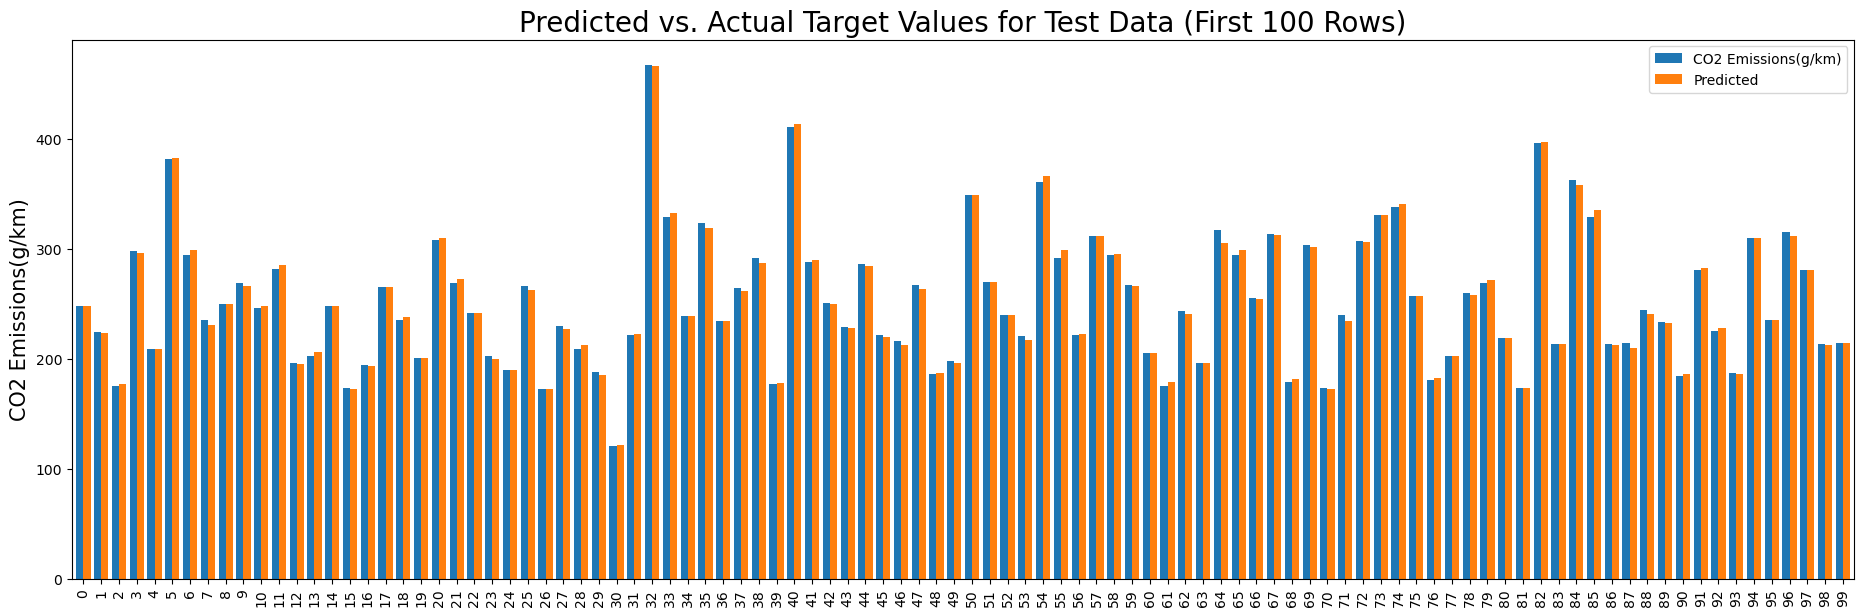

In [ ]:
import matplotlib.pyplot as plt
# compare_plot(result)
def compare_plot(df_comp):
    
    df_comp_first_100 = df_comp.iloc[:100]  # Slice the DataFrame to include only the first 100 rows
    df_comp_first_100.plot(y=['CO2 Emissions(g/km)', 'Predicted'], kind='bar', figsize=(23, 7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data (First 100 Rows)', fontsize=20)
    plt.ylabel('CO2 Emissions(g/km)', fontsize=15)
    plt.show()

compare_plot(prediction_result)

## to save the model

In [ ]:
import pickle

# Save the model to a file
with open('random_forest_regressor_model.pkl', 'wb') as file:
    pickle.dump(regressor, file)


# Load the model from the file
with open('random_forest_regressor_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model for predictions
y_pred = loaded_model.predict(X_test)
